In [16]:
import numpy as np
import pandas as pd
import epynet
import yaml
import sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas import DataFrame
import pandas as pd
import networkx as nx

In [2]:
from utils_pre.epanet_loader import get_nx_graph

## 1. import the Grpah of WDN

### Environment Paths

In [3]:
path_to_wdn = './data/L-TOWN.inp' # Do I need to distinguish between REAL and NOMINAL EPANET inps here? 

### `EPANET` Model Import

In [4]:
# Import the .inp file using the EPYNET library
wdn = epynet.Network(path_to_wdn)

# Solve hydraulic model for a single timestep
wdn.solve()

### `networkx` Graph Conversion

In [5]:
# Convert the file using a custom function, based on:
# https://github.com/BME-SmartLab/GraphConvWat 
# G: Graph in nx format; pos: node position; head: hydraulic heads which not used in this project
G , pos , head = get_nx_graph(wdn, weight_mode='pipe_length', get_head=True)

In [6]:
for key in G[347]:
    print(key)

1
348


In [7]:
G[347][1]['name']

'p253'

## 2. Visualize leakage pipes and node in 2019

In [13]:
label_dir = './data/2019_Leakages.csv'
df_label = pd.read_csv(label_dir, sep=';', decimal=',', index_col='Timestamp')
leakage_list = df_label.columns.tolist()
for node in G: # 782个节点
    for nbr in sorted(G.neighbors(node)): # 每个节点对应的邻居节点
        if G[node][nbr]['name'] in leakage_list:
            leakage_list.remove(G[node][nbr]['name'])
            print("leakage pipe {}'s nodes are: {} and {}.".format(G[node][nbr]['name'], node, nbr))

leakage pipe p277's nodes are: 19 and 363.
leakage pipe p280's nodes are: 23 and 365.
leakage pipe p523's nodes are: 132 and 523.
leakage pipe p123's nodes are: 155 and 159.
leakage pipe p586's nodes are: 165 and 562.
leakage pipe p142's nodes are: 192 and 196.
leakage pipe p710's nodes are: 228 and 648.
leakage pipe p680's nodes are: 233 and 626.
leakage pipe p762's nodes are: 264 and 683.
leakage pipe p800's nodes are: 295 and 708.
leakage pipe p193's nodes are: 326 and 327.
leakage pipe p427's nodes are: 340 and 462.
leakage pipe p257's nodes are: 350 and 351.
leakage pipe p331's nodes are: 398 and 399.
leakage pipe p426's nodes are: 461 and 462.
leakage pipe p455's nodes are: 480 and 481.
leakage pipe p514's nodes are: 517 and 518.
leakage pipe p653's nodes are: 608 and 609.
leakage pipe p654's nodes are: 609 and 610.
leakage pipe p721's nodes are: 655 and 656.
leakage pipe p810's nodes are: 716 and 717.
leakage pipe p827's nodes are: 730 and 731.
leakage pipe p879's nodes are: 765

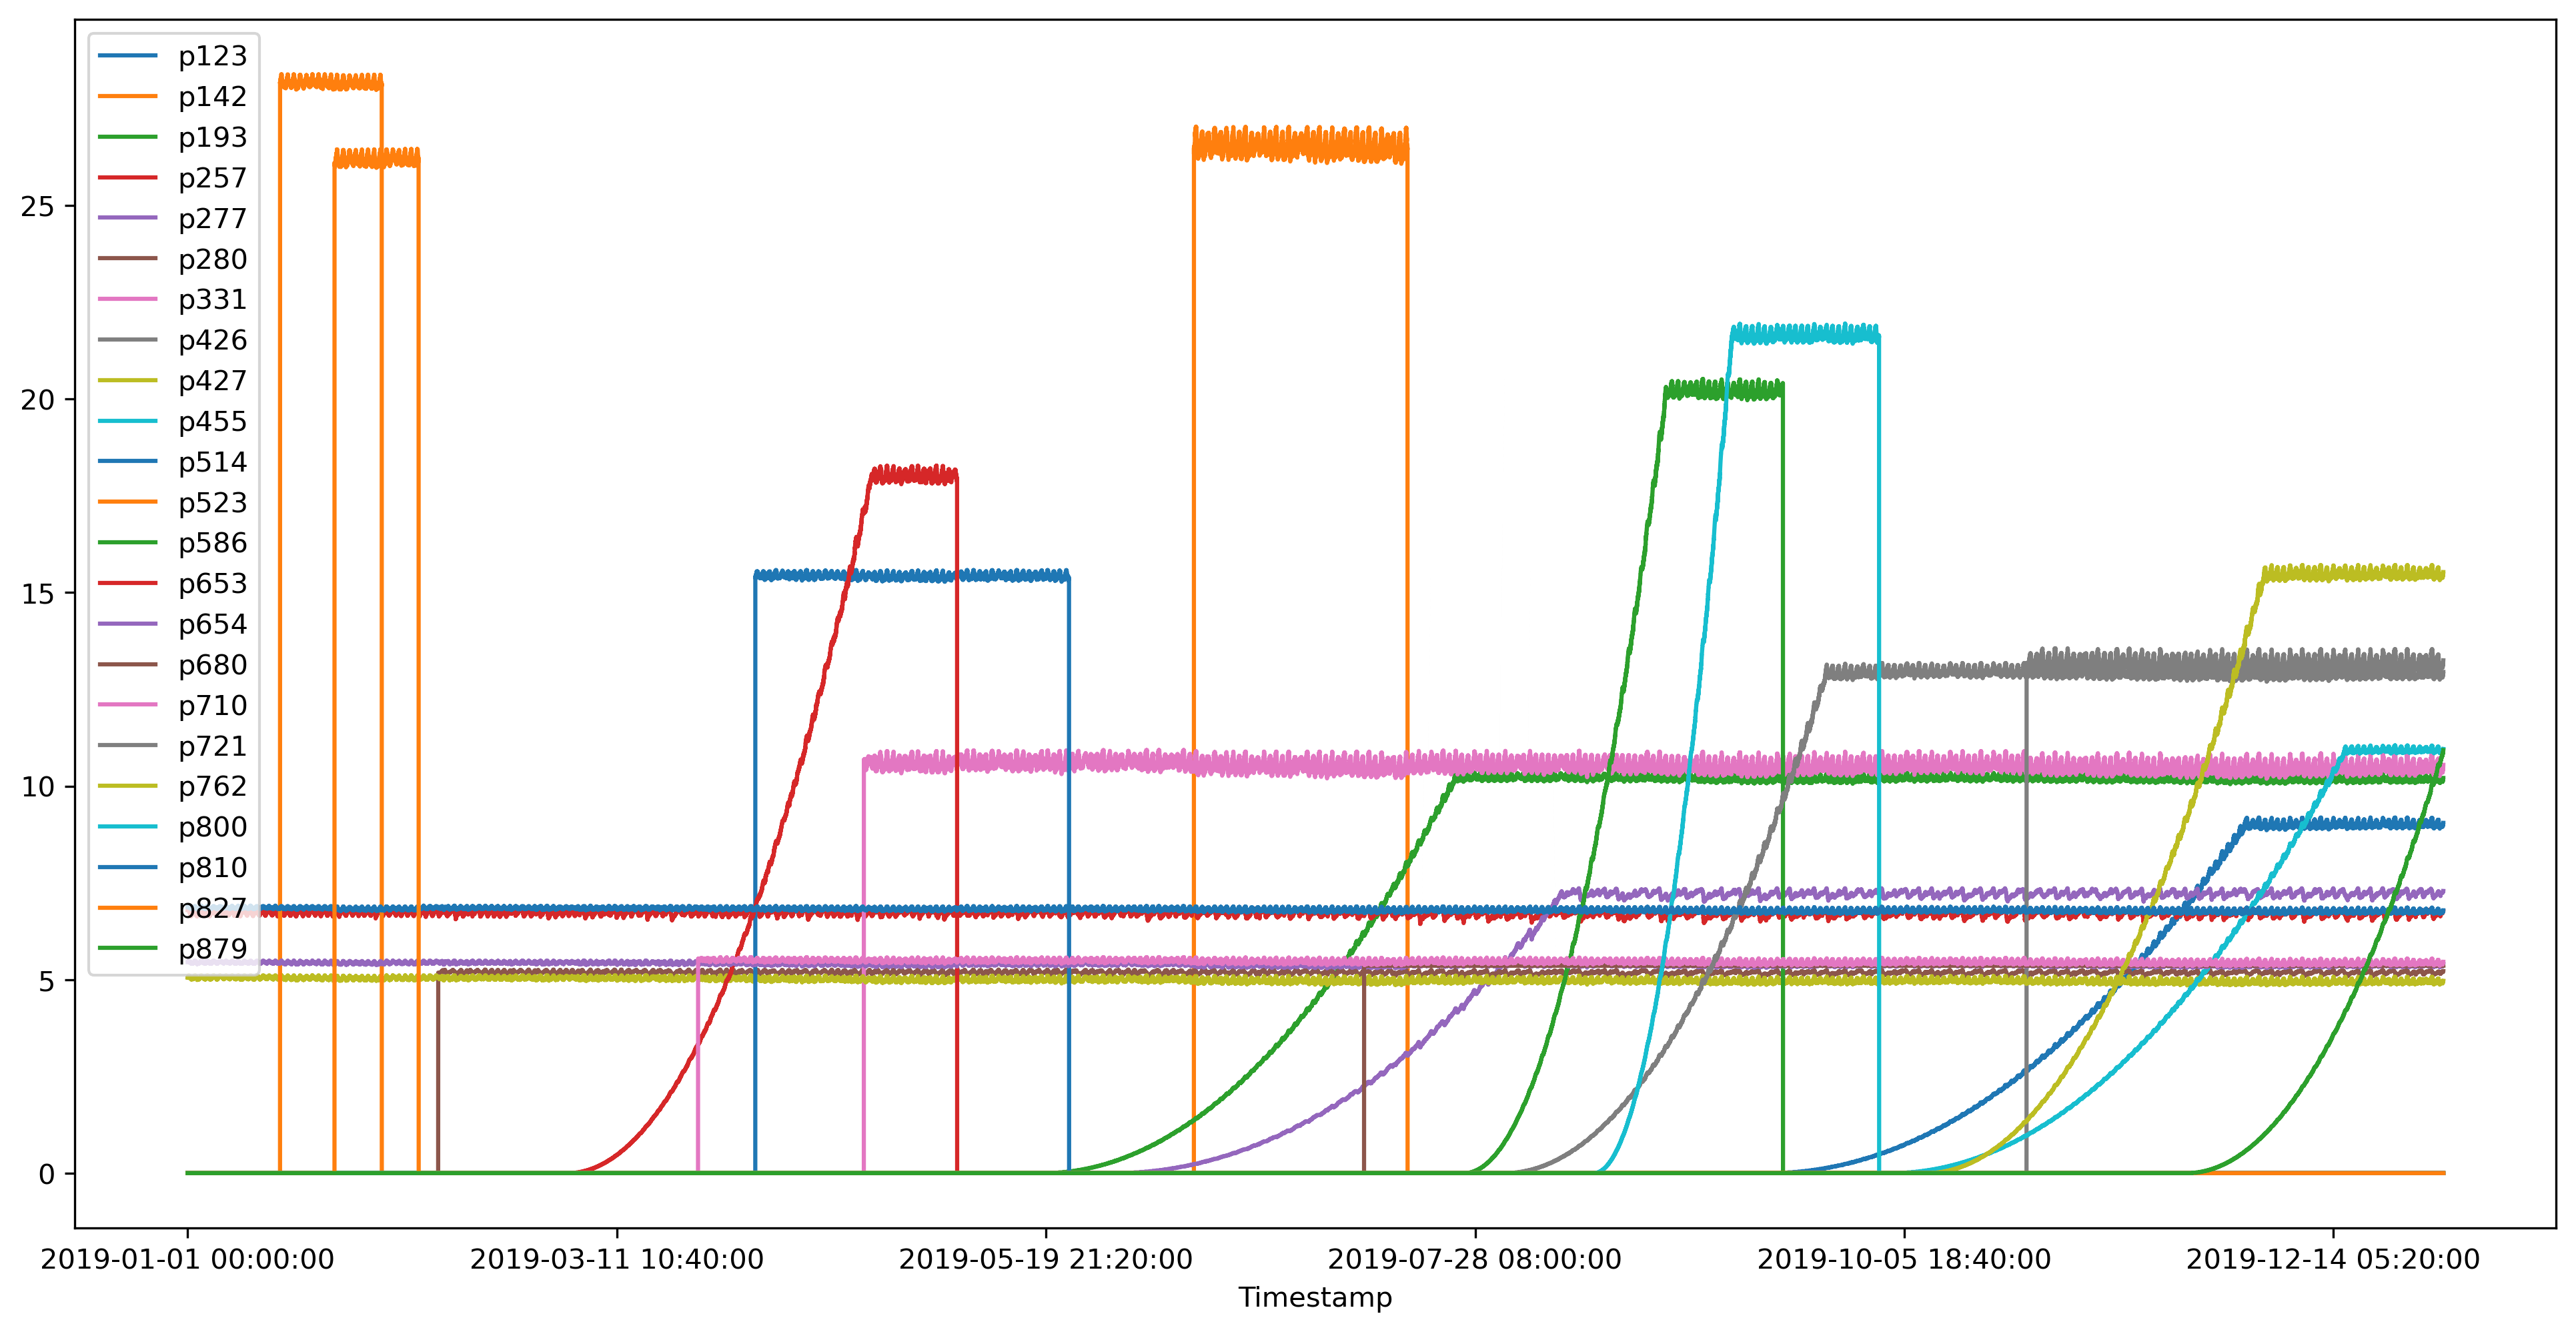

In [14]:
fig = plt.figure(figsize=(16,8),dpi=300)
df_label.plot(ax=plt.gca())
plt.show()

## 3. The leakage configuration of 2018-2019

In [8]:
path_ = './data/'
config_path = path_ + 'dataset_configuration.yaml'
try:
    with open(config_path,'r') as f:
        print('f', f)
        leak_pipes = yaml.load(f.read(),Loader=yaml.FullLoader)
except:
    print('"dataset_configuration" file not found.')
    sys.exit()

f <_io.TextIOWrapper name='./data/dataset_configuration.yaml' mode='r' encoding='UTF-8'>


In [9]:
start_time = leak_pipes['times']['StartTime']
end_time = leak_pipes['times']['EndTime']
start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M')
end_time = datetime.strptime(end_time, '%Y-%m-%d %H:%M')
leakages = leak_pipes['leakages']
leakages = leakages[1:]
number_of_leaks = len(leakages)

In [10]:
df_leakage = pd.DataFrame(leakages)
column_names = {0:'linkID', 1:'startTime', 2:'endTime', 3:'leakDiameter (m)', 4:'leakType', 5:'peakTime'}
df_leakage = pd.concat([df_leakage.iloc[:, 0].str.split(', ', expand=True)], axis=1)
df_leakage.rename(columns = column_names, inplace = True)
df_leakage

,linkID,startTime,endTime,leakDiameter (m),leakType,peakTime
0,p257,2018-01-08 13:30,2019-12-31 23:55,0.011843,incipient,2018-01-25 08:30
1,p461,2018-01-23 04:25,2018-04-02 11:40,0.021320,incipient,2018-03-27 20:35
2,p232,2018-01-31 02:35,2018-02-10 09:20,0.020108,incipient,2018-02-03 16:05
3,p427,2018-02-13 08:25,2019-12-31 23:55,0.0090731,incipient,2018-05-14 19:25
4,p673,2018-03-05 15:45,2018-03-23 10:25,0.022916,abrupt,2018-03-05 15:45
5,p810,2018-07-28 03:05,2019-12-31 23:55,0.010028,incipient,2018-11-02 22:25
6,p628,2018-05-02 14:55,2018-05-29 21:20,0.022318,incipient,2018-05-16 08:00
7,p538,2018-05-18 08:35,2018-06-02 06:05,0.021731,abrupt,2018-05-18 08:35
8,p866,2018-06-01 09:05,2018-06-12 03:00,0.018108,abrupt,2018-06-01 09:05
9,p31,2018-06-28 10:35,2018-08-12 17:30,0.016389,incipient,2018-08-03 02:45


## Getting result format in competition BattleDIM 2020 requirements

In [11]:
predictions = np.load('./evaluation/predictions.npy')
predictions = predictions.reshape((365, 782))

def out_date_by_day(year, day):
    '''
    根据输入的年份和天数计算对应的日期
    '''
    first_day=datetime(year,1,1)
    add_day= timedelta(days=day-1)
    return datetime.strftime(first_day+add_day,"%Y-%m-%d")

pipe_list = []
date_list = []
for i in range(predictions.shape[1]): # 1-782
    for key in G[i+1]: # 遍历点i的邻居节点->从而遍历管道
        pipe_name = G[i+1][key]['name']
        if len(np.argwhere(predictions[:, i] == 1)) >= 14: # 如果点i存在1标签 且365天里有>=14天为1
            start_day = np.argwhere(predictions[:, i] == 1)[0] + 1 # 点i泄露开始时间取第一次出现1时
            start_date = out_date_by_day(2019, int(start_day)) # 转为2019年的具体日期
            # print(pipe_name + ', ' + start_date + ' 00:05', file = f)
            pipe_list.append(pipe_name)
            date_list.append(start_date)   

data = {'linkID':pipe_list,
       'startDate':date_list}
df_results = DataFrame(data)
df_results['startDate'] = pd.to_datetime(df_results['startDate'])
df_results.sort_values(by=['startDate', 'linkID'], inplace = True, ignore_index = True) # 根据日期于linkID排序，这里linkID的排序有点小问题，但不影响
dup_row = df_results.duplicated(keep='first') # 找出重复行 keep='first'参数就是让系统从前向后开始筛查，这样索引较大的重复行会返回 'True'。
df_results

,linkID,startDate
0,p257,2019-01-06
1,p258,2019-01-06
2,p256,2019-01-07
3,p257,2019-01-07
4,p266,2019-01-10
...,...,...
664,p126,2019-10-26
665,p147,2019-10-26
666,p152,2019-10-26
667,p201,2019-10-26


In [12]:
### 方法1：只输出df_results里重复出现的行，即此管道的两个节点在365天里第一次出现泄露标签1
# 结果instances从669删减到了90条
results_1 = df_results[dup_row].reset_index(drop=True)
results_1.sort_values(by=['startDate', 'linkID'], inplace = True, ignore_index = True)
results_1.drop_duplicates(inplace = True, ignore_index = True)
for i in range(results_1.shape[0]):
    print(results_1['linkID'][i] + ', ' + results_1['startDate'][i].strftime("%Y-%m-%d") + ' 23:55')

p457, 2019-01-23 23:55
p544, 2019-01-23 23:55
p167, 2019-01-31 23:55
p212, 2019-01-31 23:55
p22, 2019-01-31 23:55
p296, 2019-01-31 23:55
p306, 2019-01-31 23:55
p307, 2019-01-31 23:55
p357, 2019-01-31 23:55
p405, 2019-01-31 23:55
p432, 2019-01-31 23:55
p570, 2019-01-31 23:55
p637, 2019-01-31 23:55
p748, 2019-01-31 23:55
p84, 2019-01-31 23:55
p872, 2019-01-31 23:55
p894, 2019-01-31 23:55
p897, 2019-01-31 23:55
p397, 2019-02-01 23:55
p811, 2019-02-01 23:55
p870, 2019-02-03 23:55
p166, 2019-02-07 23:55
p314, 2019-03-05 23:55
p138, 2019-05-18 23:55
p139, 2019-05-18 23:55
p140, 2019-05-18 23:55
p205, 2019-05-18 23:55
p232, 2019-05-18 23:55
p240, 2019-05-18 23:55
p245, 2019-05-18 23:55
p246, 2019-05-18 23:55
p285, 2019-05-18 23:55
p286, 2019-05-18 23:55
p287, 2019-05-18 23:55
p301, 2019-05-18 23:55
p302, 2019-05-18 23:55
p303, 2019-05-18 23:55
p31, 2019-05-18 23:55
p316, 2019-05-18 23:55
p317, 2019-05-18 23:55
p318, 2019-05-18 23:55
p32, 2019-05-18 23:55
p321, 2019-05-18 23:55
p33, 2019-05-18

In [45]:
def get_nodes_of_pipe(G, name):
    '''
    input: G - networkX format graph; name - pipe name, exmaple: 'p253'
    return: two end nodes of the pipe, example: (1, 347)
    '''
    pipe_name_dict = nx.get_edge_attributes(G, 'name')
    for key in pipe_name_dict.keys():
        if pipe_name_dict[key] == name:
            return key

def shortest_length_between_pipes(G, pipe1, pipe2):
    '''
    input: pipe1/pipe2 - two pipes in graph G, example: 'p253'/'p255'
    return: the shortest length between two starting nodes of them, example's length: 2
    '''
    length = None
    end_node_1 = get_nodes_of_pipe(G, pipe1)[0] # 0 for starting node of the pipe
    end_node_2 = get_nodes_of_pipe(G, pipe2)[0]
    if nx.has_path(G, source = end_node_1, target = end_node_2):
        length = nx.shortest_path_length(G, source = end_node_1, target = end_node_2, weight = None)
    return length

In [61]:
## 方法2: 去除了重复行后，如果pipe1和pipe2在同一天标记为泄漏，且距离<=5，用pipe1代替pipe2形成重复行，再下一单元格继续去除重复行。
# 从而大大减小同一天预测多个管道泄漏，但这些管道离的都很近的问题
# 结果instances从669删减到了141条
# df_results.drop_duplicates(['linkID'], inplace = True, ignore_index = True) # 针对linkID列进行重复删除，这样可能会造成有些在后面日期的正确答案被删除
results_2 = df_results.drop_duplicates(ignore_index = True)
date_list_no_repetition = results_2['startDate'].drop_duplicates()

for date in date_list_no_repetition: # 遍历results_2中每天
    condition1 = results_2['startDate'] == date # 只取在相同date标记为泄漏的pipe
    for pipe1 in results_2[condition1]['linkID']:
        for pipe2 in results_2[condition1]['linkID']:
            length = shortest_length_between_pipes(G, pipe1, pipe2)
            if length and length <=5: # 如果pipe1和pipe2在同一天标记为泄漏，且距离<=5，用pipe1代替pipe2形成重复行
                condition2 = results_2['linkID'] == pipe2
                index_ = results_2[condition1 & condition2].index.tolist()
                results_2.iloc[index_, 0] = pipe1 # col 0: linkID

/home/zczlx79/.conda/envs/pytorch/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
results_2 = results_2.drop_duplicates(ignore_index = True)
for i in range(results_2.shape[0]):
    print(results_2['linkID'][i] + ', ' + results_2['startDate'][i].strftime("%Y-%m-%d") + ' 23:55')

p258, 2019-01-06 23:55
p257, 2019-01-07 23:55
p266, 2019-01-10 23:55
p6, 2019-01-10 23:55
p655, 2019-01-13 23:55
p462, 2019-01-16 23:55
p99, 2019-01-17 23:55
p182, 2019-01-18 23:55
p781, 2019-01-18 23:55
p839, 2019-01-18 23:55
p83, 2019-01-20 23:55
p459, 2019-01-23 23:55
p593, 2019-01-23 23:55
p133, 2019-01-23 23:55
p185, 2019-01-23 23:55
p30, 2019-01-23 23:55
p384, 2019-01-23 23:55
p482, 2019-01-23 23:55
p569, 2019-01-23 23:55
p587, 2019-01-23 23:55
p591, 2019-01-23 23:55
p598, 2019-01-23 23:55
p674, 2019-01-23 23:55
p764, 2019-01-23 23:55
p352, 2019-01-25 23:55
p362, 2019-01-25 23:55
p383, 2019-01-25 23:55
p604, 2019-01-25 23:55
p158, 2019-01-26 23:55
p53, 2019-01-27 23:55
p9, 2019-01-31 23:55
p84, 2019-01-31 23:55
p304, 2019-01-31 23:55
p83, 2019-01-31 23:55
p673, 2019-01-31 23:55
p714, 2019-01-31 23:55
p758, 2019-01-31 23:55
p834, 2019-01-31 23:55
p872, 2019-01-31 23:55
p757, 2019-01-31 23:55
p663, 2019-01-31 23:55
p5, 2019-01-31 23:55
p311, 2019-01-31 23:55
p327, 2019-01-31 23:55


## Draft

### targets -> competition format answer

In [ ]:
targets = np.load('./evaluation/targets.npy')
targets = targets.reshape((365, 782))

In [ ]:
# 在test.py文件里
# y_score_node = torch.tensor(()).to(device)
# targets = torch.tensor(()).to(device)

# for t in range(len(y_scores)): # 遍历每一个时间步骤
#     y_score_node = torch.cat((y_score_node, y_scores[t]), 0)
#     targets = torch.cat((targets, labels[t].long()))

In [ ]:
def out_date_by_day(year, day):
    '''
    根据输入的年份和天数计算对应的日期
    '''
    first_day=datetime(year,1,1)
    add_day= timedelta(days=day-1)
    return datetime.strftime(first_day+add_day,"%Y-%m-%d")

In [ ]:
pipe_list = []
date_list = []
for i in range(targets.shape[1]): # 1-782
    for key in G[i+1]: # 遍历点i的邻居节点->从而遍历管道
        pipe_name = G[i+1][key]['name']
        if len(np.argwhere(targets[:, i] == 1)): # 如果点i存在1标签
            start_day = np.argwhere(targets[:, i] == 1)[0] + 1 # 点i泄露开始时间取第一次出现1时
            start_date = out_date_by_day(2019, int(start_day)) # 转为2019年的具体日期
            # print(pipe_name + ', ' + start_date + ' 00:05', file = f)
            pipe_list.append(pipe_name)
            date_list.append(start_date)       

In [ ]:
data = {'linkID':pipe_list,
       'startDate':date_list}
df_results = DataFrame(data)
df_results['startDate'] = pd.to_datetime(df_results['startDate'])
df_results.sort_values(by=['startDate', 'linkID'], inplace = True, ignore_index = True)
# df_results.drop_duplicates(['linkID'], inplace = True, ignore_index = True) # 针对linkID列进行重复删除，这样可能会造成有些在后面日期的正确答案被删除
df_results.drop_duplicates(inplace = True, ignore_index = True)

In [ ]:
## leakage pipe p257's nodes are: 350 and 351. 2018-01-08 13:30	2019-12-31 23:55
# targets[:, 349] # node 350在2019年的标签 全1
# targets[:, 350] # node 351在2019年的标签 全1
# targets[:, 351] # node 351在2019年的标签 全0

## leakage pipe p879's nodes are: 765 and 766. 2019-11-20 11:55	2019-12-31 23:55
# targets[:, 764] # node 764在2019年的标签 11-20~12-31标签为1
# np.argwhere(targets[:, 764] == 1)[0] # array([324])
# out_date_by_day(2019, 324+1) # '2019.11.21' # 见下一单元格debug

## leakage pipe p523's nodes are: 132 and 523. 2019-01-15 23:00	2019-02-01 09:50
# np.argwhere(targets[:, 131] == 1)[0] # array([14])
# out_date_by_day(2019, 14+1) # '2019.01.15'

In [ ]:
df_label['p879'][93310: 93460] # p879在2019-11-20 11:55开始泄露，但11.20当天并没有非0的数值，所以误判，不影响

Timestamp
2019-11-20 23:50:00    0.00
2019-11-20 23:55:00    0.00
2019-11-21 00:00:00    0.00
2019-11-21 00:05:00    0.00
2019-11-21 00:10:00    0.00
                       ... 
2019-11-21 11:55:00    0.01
2019-11-21 12:00:00    0.01
2019-11-21 12:05:00    0.01
2019-11-21 12:10:00    0.01
2019-11-21 12:15:00    0.01
Name: p879, Length: 150, dtype: float64

### see the frequencies of True Positive labels -> have suitable threshold

In [ ]:
pipe_true = ['p257', 'p654', 'p185', 'p410', 'p504', 'p860', 'p251', 'p631', 'p723', 'p329', 'p147', 'p126']

In [ ]:
for i in range(predictions.shape[1]): # 1-782
    for key in G[i+1]: # 遍历点i的邻居节点->从而遍历管道
        pipe_name = G[i+1][key]['name']
        if pipe_name in pipe_true:
            if len(np.argwhere(predictions[:, i] == 1)): # 如果点i存在1标签
                start_day = np.argwhere(predictions[:, i] == 1)[0] + 1 # 点i泄露开始时间取第一次出现1时
                start_date = out_date_by_day(2019, int(start_day)) # 转为2019年的具体日期
                print(pipe_name + ', ' + start_date + ' ' + str(len(np.argwhere(predictions[:, i] == 1))))

p251, 2019-03-05 20
p251, 2019-01-31 298
p410, 2019-01-31 330
p126, 2019-10-26 14
p631, 2019-05-02 85
p147, 2019-10-26 14
p147, 2019-08-01 70
p723, 2019-05-18 14
p185, 2019-01-23 325
p257, 2019-01-07 359
p257, 2019-01-06 360
p329, 2019-03-05 247
p329, 2019-05-18 16
p410, 2019-02-01 329
p504, 2019-01-31 11
p631, 2019-05-18 34
p654, 2019-05-02 244
p654, 2019-01-13 353
p723, 2019-05-16 45
p860, 2019-01-31 28
